# Part I: Descriptive Statistics

## Import Libraries 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

## Import and Filter Data

In [2]:
df=pd.read_csv('Capstone_2_normalised_data.csv')
#df.head()
df=df.drop(['id', 'url', 'region_url', 'image_url'], axis=1)
df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [3]:
df_ca=df[df.state=='ca']
df_ca.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [4]:
df_ca1=df_ca[df_ca['region']=='ventura county']
df_ca1.head(2)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state
856,ventura county,2000,apartment,850,2,1.5,1,1,1,0,0,0,laundry on site,carport,"Villa Palazzo, managed by iasset management 75...",34.2244,-119.043,ca
6871,ventura county,1700,condo,724,1,1.0,1,1,0,0,0,0,w/d in unit,attached garage,"Cute 1 Bedroom, 1 Bath unit on bottom floor. S...",34.2854,-118.761,ca


In [5]:
df_ca1['description_count'] = df_ca1.description.apply(lambda x: len(x.split()))
df_ca1.head(2)

C:\Users\npana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state,description_count
856,ventura county,2000,apartment,850,2,1.5,1,1,1,0,0,0,laundry on site,carport,"Villa Palazzo, managed by iasset management 75...",34.2244,-119.043,ca,53
6871,ventura county,1700,condo,724,1,1.0,1,1,0,0,0,0,w/d in unit,attached garage,"Cute 1 Bedroom, 1 Bath unit on bottom floor. S...",34.2854,-118.761,ca,73


## Data Cleaning

In [6]:
df_ca1.isnull().sum()

region                       0
price                        0
type                         0
sqfeet                       0
beds                         0
baths                        0
cats_allowed                 0
dogs_allowed                 0
smoking_allowed              0
wheelchair_access            0
electric_vehicle_charge      0
comes_furnished              0
laundry_options            581
parking_options            809
description                  0
lat                          1
long                         1
state                        0
description_count            0
dtype: int64

In [7]:
df_ca1.groupby('type')['laundry_options'].value_counts()

type           laundry_options   
apartment      w/d in unit           1222
               laundry on site        456
               laundry in bldg         22
               w/d hookups             11
               no laundry on site       8
condo          w/d in unit             29
               w/d hookups             13
               laundry in bldg          4
               laundry on site          4
cottage/cabin  no laundry on site       1
               w/d hookups              1
               w/d in unit              1
duplex         w/d hookups              5
               w/d in unit              4
               laundry on site          3
               laundry in bldg          2
               no laundry on site       2
house          w/d in unit             57
               w/d hookups             52
               laundry on site          8
               laundry in bldg          5
               no laundry on site       1
in-law         no laundry on site       2


In [8]:
df_ca1['laundry_options'].value_counts(dropna=False)

w/d in unit           1346
NaN                    581
laundry on site        477
w/d hookups            117
laundry in bldg         43
no laundry on site      15
Name: laundry_options, dtype: int64

In [9]:
df_ca1['laundry_options'].fillna('w/d in unit')

856       laundry on site
6871          w/d in unit
6879      laundry on site
7184          w/d in unit
7201          w/d in unit
               ...       
14696         w/d in unit
14697     laundry on site
14698         w/d in unit
379409        w/d in unit
379475        w/d in unit
Name: laundry_options, Length: 2579, dtype: object

In [10]:
df_ca1.groupby('type')['parking_options'].value_counts()

type           parking_options   
apartment      carport               1099
               attached garage        232
               detached garage         84
               off-street parking      68
               street parking           7
               no parking               4
condo          attached garage         23
               detached garage         16
               carport                  9
               off-street parking       1
cottage/cabin  off-street parking       2
               carport                  1
duplex         attached garage          5
               street parking           5
               off-street parking       3
               detached garage          2
               no parking               1
house          attached garage         91
               off-street parking      19
               detached garage          6
               carport                  3
               street parking           3
in-law         off-street parking       3


In [11]:
df_ca1['parking_options'].value_counts(dropna=False)

carport               1142
NaN                    809
attached garage        399
detached garage        110
off-street parking      97
street parking          17
no parking               5
Name: parking_options, dtype: int64

In [12]:
df_ca1['parking_options'].fillna('carport')

856               carport
6871      attached garage
6879              carport
7184              carport
7201      attached garage
               ...       
14696     attached garage
14697             carport
14698             carport
379409            carport
379475            carport
Name: parking_options, Length: 2579, dtype: object

In [13]:
df_ca1.shape

(2579, 19)

## Removing Oultliers

In [14]:
Q1 = df_ca1.quantile(0.25)
Q3 = df_ca1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price                      660.00000
sqfeet                     365.00000
beds                         1.00000
baths                        1.00000
cats_allowed                 0.00000
dogs_allowed                 0.00000
smoking_allowed              1.00000
wheelchair_access            0.00000
electric_vehicle_charge      0.00000
comes_furnished              0.00000
lat                          0.08045
long                         0.34900
description_count          150.00000
dtype: float64


In [15]:
outliers=(df_ca1 < (Q1 - 1.5 * IQR)) |(df_ca1 > (Q3 + 1.5 * IQR)) 
df_valid= df_ca1[~((df_ca1 < (Q1 - 1.5 * IQR)) |(df_ca1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_valid.shape

(1678, 19)

In [16]:
df_valid.head(2)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state,description_count
856,ventura county,2000,apartment,850,2,1.5,1,1,1,0,0,0,laundry on site,carport,"Villa Palazzo, managed by iasset management 75...",34.2244,-119.043,ca,53
6871,ventura county,1700,condo,724,1,1.0,1,1,0,0,0,0,w/d in unit,attached garage,"Cute 1 Bedroom, 1 Bath unit on bottom floor. S...",34.2854,-118.761,ca,73


In [17]:
df_valid.to_excel('df_valid.xlsx')

## Data Normalization

In [18]:

df_ca_V=df_valid[df_valid.region.isin(['ventura county'])]
X_data=df_ca_V[['price','sqfeet', 'description_count']]
X_data2=X_data.apply(lambda x: (x - x.min(axis=0)) / ((x.max(axis=0))-(x.min(axis=0))))
X_data2.head(2)

,price,sqfeet,description_count
856,0.313253,0.314465,0.091270
6871,0.168675,0.215409,0.130952


In [19]:
X_data2.shape

(1678, 3)

In [20]:
df_filt=df_valid.drop([ 'sqfeet','description_count', 'price' ], axis=1)

In [21]:
df_normalised=pd.concat([df_filt, X_data2], axis=1)
df_normalised.head(2)

,region,type,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state,price,sqfeet,description_count
856,ventura county,apartment,2,1.5,1,1,1,0,0,0,laundry on site,carport,"Villa Palazzo, managed by iasset management 75...",34.2244,-119.043,ca,0.313253,0.314465,0.091270
6871,ventura county,condo,1,1.0,1,1,0,0,0,0,w/d in unit,attached garage,"Cute 1 Bedroom, 1 Bath unit on bottom floor. S...",34.2854,-118.761,ca,0.168675,0.215409,0.130952


In [22]:
df_normalised.shape

(1678, 19)

In [23]:
df_normalised.describe()

,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,price,sqfeet,description_count
count,1678.000000,1678.000000,1678.0,1678.0,1678.000000,1678.0,1678.0,1678.0,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000
mean,1.864720,1.591180,1.0,1.0,0.805125,0.0,0.0,0.0,34.225308,-118.989707,0.431857,0.414531,0.477022
std,0.686479,0.509919,0.0,0.0,0.396222,0.0,0.0,0.0,0.039071,0.181989,0.173532,0.179441,0.192560
min,0.000000,0.000000,1.0,1.0,0.000000,0.0,0.0,0.0,34.122700,-119.358000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.0,1.0,1.000000,0.0,0.0,0.0,34.209800,-119.174000,0.303614,0.289308,0.325893
50%,2.000000,2.000000,1.0,1.0,1.000000,0.0,0.0,0.0,34.231300,-119.046000,0.407229,0.412736,0.464286
75%,2.000000,2.000000,1.0,1.0,1.000000,0.0,0.0,0.0,34.262800,-118.826000,0.546988,0.498428,0.638889
max,3.000000,3.000000,1.0,1.0,1.000000,0.0,0.0,0.0,34.354700,-118.432000,1.000000,1.000000,1.000000


## Insights

In [24]:
df_filt2=df_normalised[['price', 'sqfeet', 'beds', 'baths', 'description_count']]
df_filt2.head()

,price,sqfeet,beds,baths,description_count
856,0.313253,0.314465,2,1.5,0.091270
6871,0.168675,0.215409,1,1.0,0.130952
7340,0.481928,0.580189,2,2.0,0.105159
7482,0.216867,0.157233,1,1.0,0.103175
7530,0.221687,0.113208,1,1.0,0.507937


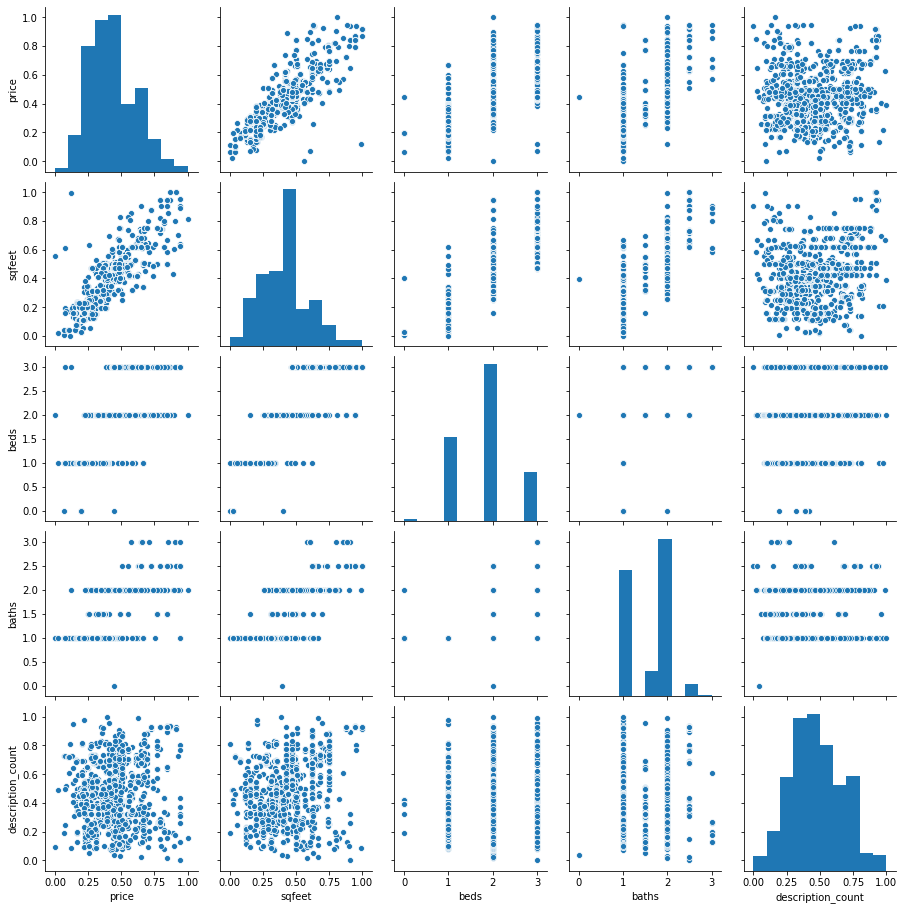

In [25]:
g=sns.pairplot(df_filt2)
g.savefig("output.png")

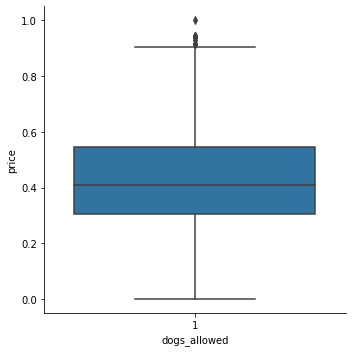

In [26]:
sns.catplot(x="dogs_allowed", y="price", kind="box", data=df_normalised)

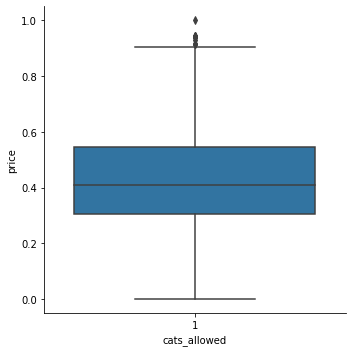

In [27]:
sns.catplot(x="cats_allowed", y="price", kind="box", data=df_normalised)

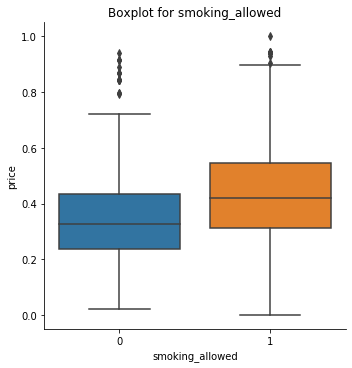

In [28]:
sns.catplot(x="smoking_allowed", y="price", kind="box", data=df_normalised)
plt.title('Boxplot for smoking_allowed')
plt.savefig("Boxplot for Somking", bbox_inches="tight")

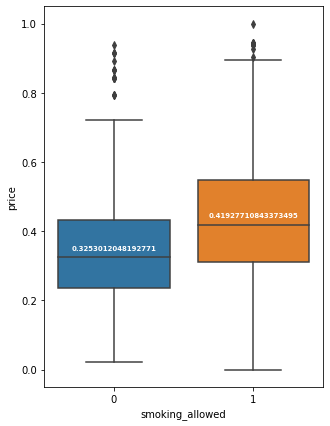

In [29]:
plt.rcParams['figure.figsize']=5,7
box_plot=sns.boxplot(x="smoking_allowed", y="price", data=df_normalised)
medians = df_normalised.groupby(['smoking_allowed'])['price'].median()
vertical_offset = df_normalised['price'].median()*0.05# offset from median for display
for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
plt.show()

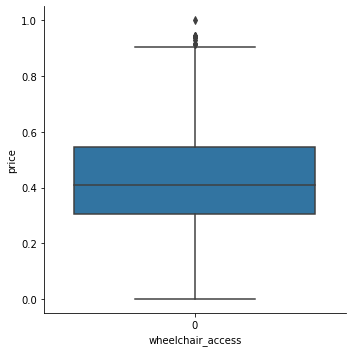

In [30]:
sns.catplot(x="wheelchair_access", y="price", kind="box", data=df_normalised)

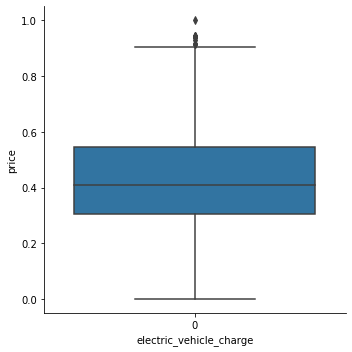

In [31]:
sns.catplot(x="electric_vehicle_charge", y="price", kind="box", data=df_normalised)

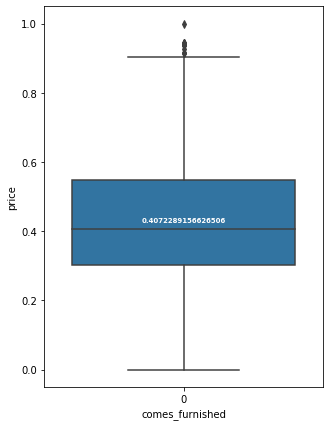

In [32]:
plt.rcParams['figure.figsize']=5,7
box_plot=sns.boxplot(x="comes_furnished", y="price", data=df_normalised)
medians = df_normalised.groupby(['comes_furnished'])['price'].median()
vertical_offset = df_normalised['price'].median()*0.05# offset from median for display
for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
plt.show()


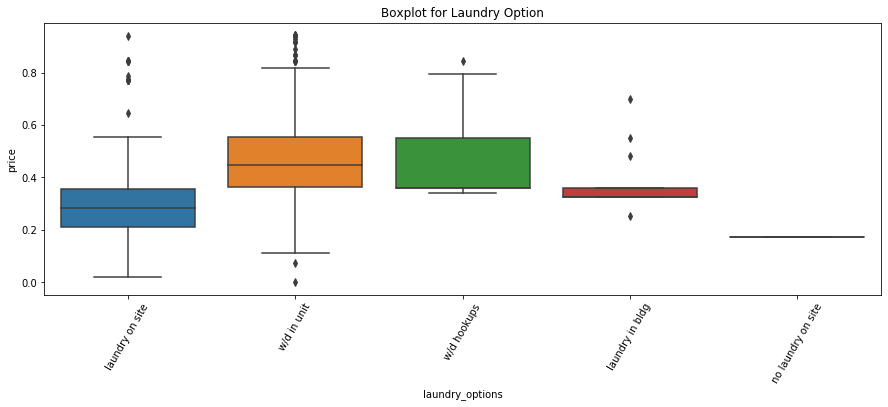

In [33]:
plt.rcParams['figure.figsize']=15,5
box_plot=sns.boxplot(x="laundry_options", y="price", data=df_normalised)
plt.title('Boxplot for Laundry Option')
plt.xticks(rotation=60)
#plt.savefig('foo.png',bbox_inches='tight', dpi=500 )
plt.show()

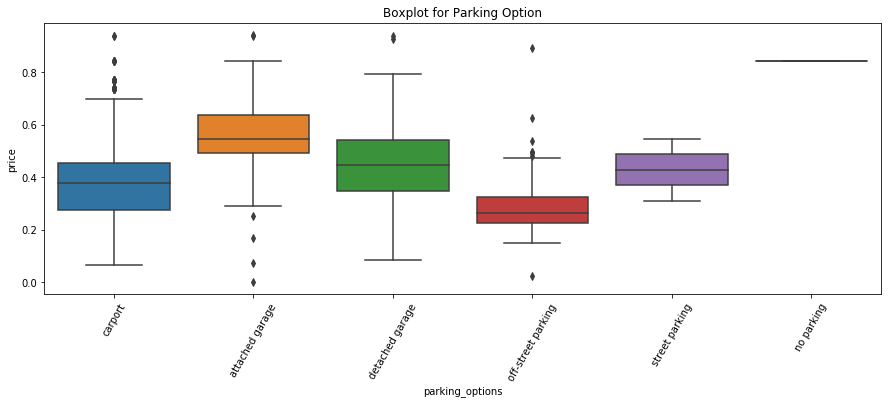

In [34]:
plt.rcParams['figure.figsize']=15,5
box_plot=sns.boxplot(x="parking_options", y="price", data=df_normalised)
plt.title('Boxplot for Parking Option')
plt.xticks(rotation=60)
#plt.savefig('foo.png',bbox_inches='tight', dpi=500 )
plt.show()



## Creating Dummy Variables

In [35]:
dataframe1=pd.get_dummies(df_normalised, columns=['laundry_options'], drop_first=False)
dataframe1.head(2)


,region,type,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,long,state,price,sqfeet,description_count,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit
856,ventura county,apartment,2,1.5,1,1,1,0,0,0,...,-119.043,ca,0.313253,0.314465,0.091270,0,1,0,0,0
6871,ventura county,condo,1,1.0,1,1,0,0,0,0,...,-118.761,ca,0.168675,0.215409,0.130952,0,0,0,0,1


In [36]:
df_valid2=pd.get_dummies(dataframe1, columns=['parking_options'], drop_first=False)
df_valid2.head(2)

,region,type,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking
856,ventura county,apartment,2,1.5,1,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6871,ventura county,condo,1,1.0,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [37]:
df_valid2.shape

(1678, 28)

In [38]:
df_valid3=df_valid2.drop(['region', 'type', 'description','cats_allowed', 'dogs_allowed',
                          'wheelchair_access', 'electric_vehicle_charge',
                          'comes_furnished','long', 'lat', 'state' ], axis=1)
df_valid3.head()

,beds,baths,smoking_allowed,price,sqfeet,description_count,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking
856,2,1.5,1,0.313253,0.314465,0.091270,0,1,0,0,0,0,1,0,0,0,0
6871,1,1.0,0,0.168675,0.215409,0.130952,0,0,0,0,1,1,0,0,0,0,0
7340,2,2.0,0,0.481928,0.580189,0.105159,0,0,0,0,1,0,1,0,0,0,0
7482,1,1.0,1,0.216867,0.157233,0.103175,0,1,0,0,0,0,1,0,0,0,0
7530,1,1.0,1,0.221687,0.113208,0.507937,0,0,0,0,1,0,1,0,0,0,0


## Part II: Inferential Statistical Analysis

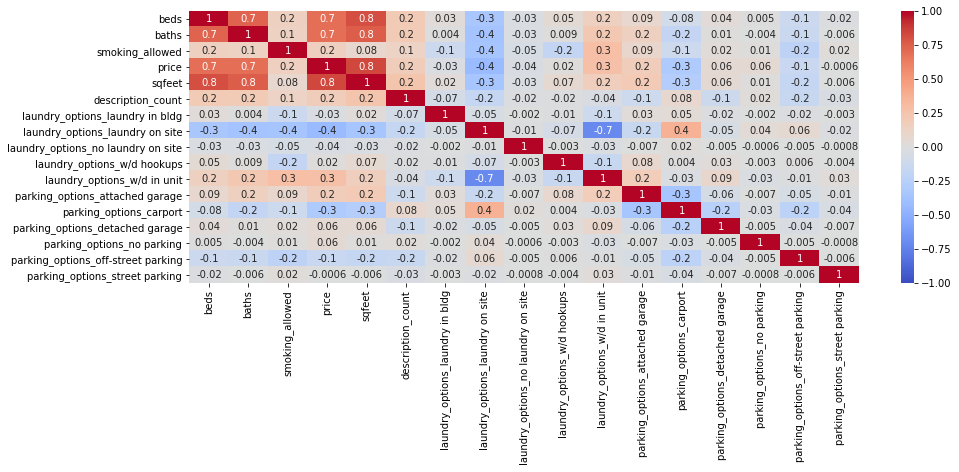

In [39]:
heatmap=sns.heatmap(df_valid3.corr(), annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.savefig('heatmap.png',bbox_inches='tight', dpi=500 )
plt.show()


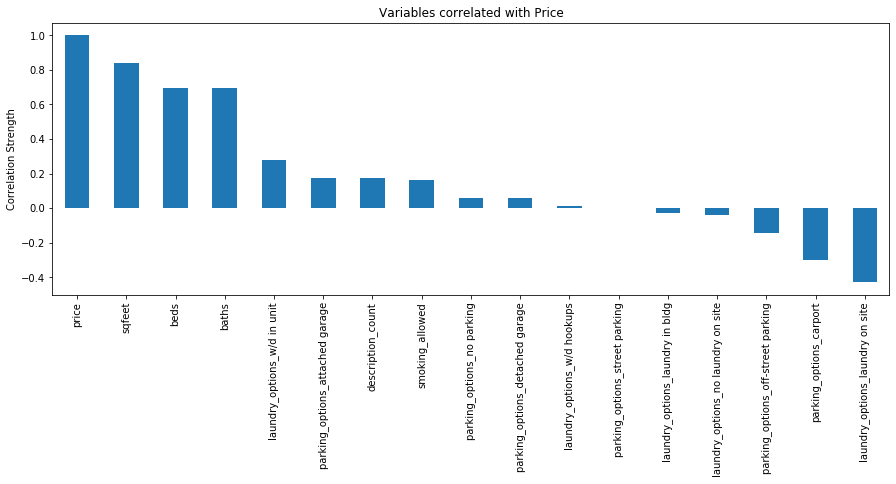

In [40]:
plt.rcParams['figure.figsize']=(15,5)
corr=df_valid3.corr()
corr = corr.sort_values("price", ascending=False)
corr['price'].plot(kind='bar')
plt.title("Variables correlated with Price")
plt.ylabel("Correlation Strength")
plt.savefig('barchart.png',bbox_inches='tight', dpi=500 )
plt.show()

In [41]:
corr = corr.sort_values("price", ascending=False)
corr.head()

,beds,baths,smoking_allowed,price,sqfeet,description_count,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking
price,0.694363,0.693897,0.161055,1.000000,0.841510,0.172053,-0.026121,-0.428805,-0.036639,0.015215,0.280663,0.175576,-0.301796,0.057245,0.057925,-0.145293,-0.000586
sqfeet,0.813812,0.758530,0.082583,0.841510,1.000000,0.243409,0.023601,-0.345526,-0.025394,0.069195,0.164124,0.209042,-0.272839,0.058120,0.012063,-0.167939,-0.006174
beds,1.000000,0.739650,0.150750,0.694363,0.813812,0.197232,0.027322,-0.330294,-0.030769,0.053113,0.155491,0.085822,-0.083777,0.035765,0.004814,-0.126022,-0.018359
baths,0.739650,1.000000,0.133745,0.693897,0.758530,0.202942,0.004196,-0.366016,-0.028319,0.009078,0.222466,0.150876,-0.175435,0.011291,-0.004368,-0.136798,-0.006179
laundry_options_w/d in unit,0.155491,0.222466,0.285841,0.280663,0.164124,-0.036489,-0.111263,-0.707918,-0.030748,-0.148440,1.000000,0.184494,-0.027807,0.093209,-0.030748,-0.013200,0.027434


In [42]:
df_valid3.head()

,beds,baths,smoking_allowed,price,sqfeet,description_count,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking
856,2,1.5,1,0.313253,0.314465,0.091270,0,1,0,0,0,0,1,0,0,0,0
6871,1,1.0,0,0.168675,0.215409,0.130952,0,0,0,0,1,1,0,0,0,0,0
7340,2,2.0,0,0.481928,0.580189,0.105159,0,0,0,0,1,0,1,0,0,0,0
7482,1,1.0,1,0.216867,0.157233,0.103175,0,1,0,0,0,0,1,0,0,0,0
7530,1,1.0,1,0.221687,0.113208,0.507937,0,0,0,0,1,0,1,0,0,0,0


In [43]:
columns=['beds','baths','smoking_allowed',
         'sqfeet', 'description_count','laundry_options_laundry in bldg',
         'laundry_options_laundry on site','laundry_options_no laundry on site',
         'laundry_options_w/d hookups','laundry_options_w/d in unit',
         'parking_options_attached garage','parking_options_carport',
         'parking_options_detached garage','parking_options_no parking',
         'parking_options_off-street parking','parking_options_street parking',
         'price']
df_reindex=df_valid3.reindex(columns=columns)
df_reindex.tail()

,beds,baths,smoking_allowed,sqfeet,description_count,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,price
14692,2,1.0,1,0.423742,0.509921,0,0,0,0,1,0,1,0,0,0,0,0.407229
14694,2,2.0,1,0.401730,0.357143,0,0,0,0,1,0,0,0,0,0,0,0.492530
14698,2,2.5,0,0.942610,0.926587,0,0,0,0,1,0,0,0,0,0,0,0.843373
379409,3,2.0,1,0.683176,0.734127,0,0,0,0,1,0,1,0,0,0,0,0.648193
379475,2,2.0,1,0.469340,0.706349,0,0,0,0,1,0,1,0,0,0,0,0.479518


In [44]:
df_reindex.shape

(1678, 17)

In [45]:
y=df_reindex.iloc[:, -1]

In [46]:
print(y)

856       0.313253
6871      0.168675
7340      0.481928
7482      0.216867
7530      0.221687
            ...   
14692     0.407229
14694     0.492530
14698     0.843373
379409    0.648193
379475    0.479518
Name: price, Length: 1678, dtype: float64


In [47]:
x=df_reindex.iloc[:, 0:16]

In [48]:
x.shape

(1678, 16)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [50]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
regressor.intercept_

0.10280138350963058

In [52]:
regressor.coef_

array([-0.00558229,  0.03997584,  0.01519729,  0.69712843, -0.04205247,
       -0.05381574, -0.02513497, -0.08285451, -0.02110916,  0.03381126,
       -0.03658575, -0.02727599, -0.01217666,  0.37815477, -0.02144369,
       -0.02909931])

In [53]:
y_pred=regressor.predict(x_test)
y_pred[0]

0.6352977547272287

In [54]:
print(y_test)

13723    0.672289
13884    0.568675
12941    0.385542
14147    0.795181
12576    0.409639
           ...   
12187    0.843373
13338    0.546988
13962    0.650602
12211    0.843373
13589    0.696386
Name: price, Length: 336, dtype: float64


In [55]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)
print(score)

0.7674712790749986


In [56]:
import statsmodels.api as sm
x1=x
y1=y
x=sm.add_constant(x)
model=sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     310.9
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:24:11   Log-Likelihood:                 1720.4
No. Observations:                1678   AIC:                            -3407.
Df Residuals:                    1661   BIC:                            -3315.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [57]:
# checking accuracy using mean square error (MSE)
np.mean((y_pred-y_test)**2)

0.006755013880615776

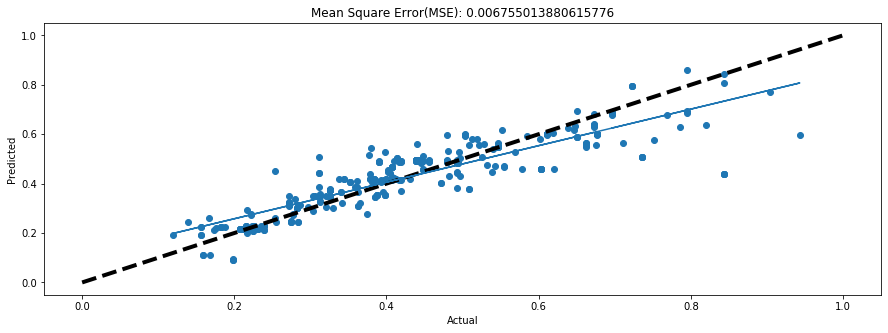

In [58]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Mean Square Error(MSE): ' + str(np.mean((y_pred-y_test)**2)))
y_test, y_pred=y_test.values.reshape(-1, 1), y_pred.reshape(-1, 1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test))
plt.savefig('scatter.png',bbox_inches='tight', dpi=500 )
plt.show()